In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
#Read in data
df = pd.read_csv("insta_clean.csv")
df.head(5)

,Caption,Instagram,YouTube,Twitter
0,bye,1,0,0
1,"Ok, a few more... sorry I just had so much fun...",1,0,0
2,This was one of my favorite shoots I've ever d...,1,0,0
3,Wrapped round my finger like a ring,1,0,0
4,Yesterday was so much fun!! has been such a hu...,1,0,0


In [3]:
# Some extra cleaning. Replacing html ampersand codes.
from w3lib.html import replace_entities
df["Caption"] = df["Caption"].astype(str)
df["Caption"] = df["Caption"].apply(replace_entities)

# Positive/Negative Word Counts
Positive and negative word lists pulled from https://ptrckprry.com/course/ssd/data/positive-words.txt
and https://ptrckprry.com/course/ssd/data/negative-words.txt
respectively.

First we read in the word lists and set up functions that will count their occurences.

In [4]:
with open("wordLists/positive_words.txt",'r') as file:
    positive_words = file.read().splitlines()

with open("wordLists/negative_words.txt",'r') as file:
    negative_words = file.read().splitlines()

In [5]:
print(len(positive_words))
print(len(negative_words))

2006
4783


In [6]:
#Functions that count the occurences of positive/negative words in a text string
def count_positive(text):
    counter = 0
    for word in positive_words:
        counter += text.lower().split().count(word)
    return counter
def count_negative(text):
    counter = 0
    for word in negative_words:
        counter += text.lower().split().count(word)
    return counter

We create the new features (this takes a minute to run)

In [7]:
df["positive_words"] = df["Caption"].apply(count_positive)

In [8]:
df["negative_words"] = df["Caption"].apply(count_negative)

Look at some stats

In [9]:
df.positive_words.describe()

count    15652.000000
mean         0.558587
std          1.182186
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         21.000000
Name: positive_words, dtype: float64

In [10]:
df.negative_words.describe()

count    15652.000000
mean         0.155380
std          0.598281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: negative_words, dtype: float64

What are the most positive and negative tweets?

In [11]:
most_positive = df["positive_words"].argmax()

In [12]:
print(df.iloc[most_positive].Caption)
print(df.iloc[most_positive].positive_words)

I don't know about these award shows.. No disrespect to anybody at any of the shows or the people running it. Nothing but love for you guys and your support. But I don't feel good when I'm there nor after. I try to think of it as a celebration but can't help feeling like people are rating and grading my performance. A lot of people in the audience there to be seem worried about how much camera time they will get or who they can network with. When I'm doing a regular show I feel they are there for the right reasons and to strictly have a good time! But these award shows seem so hollow. I get the premise is to award people for their accomplishments, but is it really? Because when I look in the audience I see a bunch of fake smiles so that when the camera hits them they look happy. Sure there are people truly proud of others so I don't want to knock them I'm just looking at the vast majority. I just think to myself if I'm living my purpose I want the reward to be fulfillment. I'm getting 

In [13]:
most_negative = df["negative_words"].argmax()

In [14]:
print(df.iloc[most_negative].Caption)
print(df.iloc[most_negative].negative_words)

Wow this story! Thank you "The first photo was taken when I was at my lowest weight, 69lbs. The photo next to it is one of my recent photo shoots. I'm Christina. I've been blessed with incredibly supportive friends and family. Lately, things have been amazing. But there's been multiple times where things haven't been. I was born with congenial pulmonary lymph angestia; a rare lung condition that at the time of my diagnosis, there were 20 people in my state that had ever had it. At the time of my diagnosis, the disease had a 97% morality rate in infants. I weighed 3 pounds and 6 ounces. My lungs weren't fully developed and they were filled with mucus. I was in the ICU for about six months before I was able to go home. At home, I had a heart monitor for my younger years, as well as frequent hospital trips caused by extreme difficulty breathing and physical developmental issues. When I was 16 until I was 19, I had to drop out of high school and become homeschooled because I got so sick. I

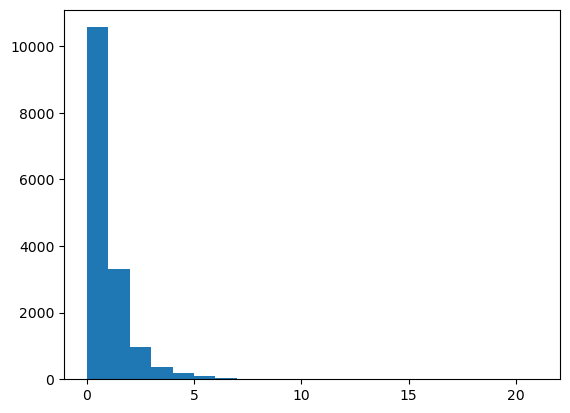

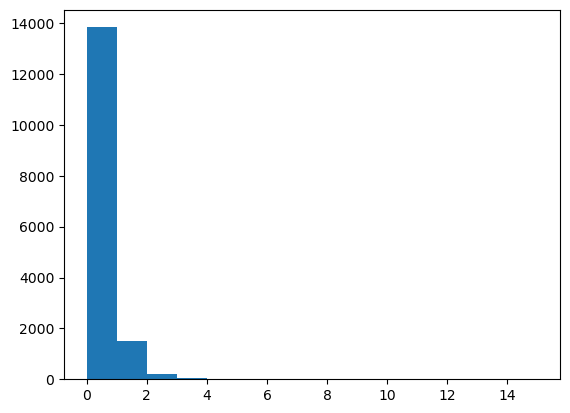

In [15]:
plt.hist(df.positive_words, bins = df.positive_words.max())
plt.show()
plt.hist(df.negative_words, bins = df.negative_words.max())
plt.show()

# Text Length

In [16]:
df["length"] = df["Caption"].apply(len)
df["word_count"] = df["Caption"].apply((lambda s:len(s.split())))

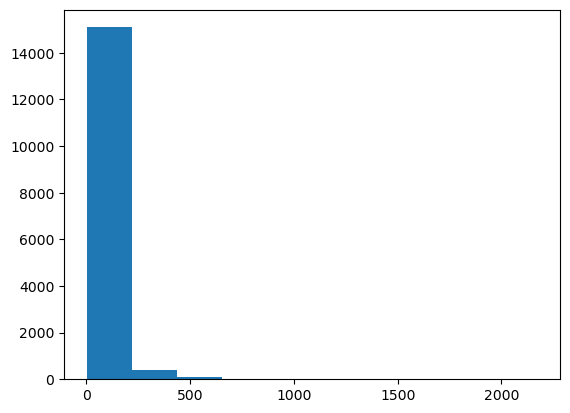

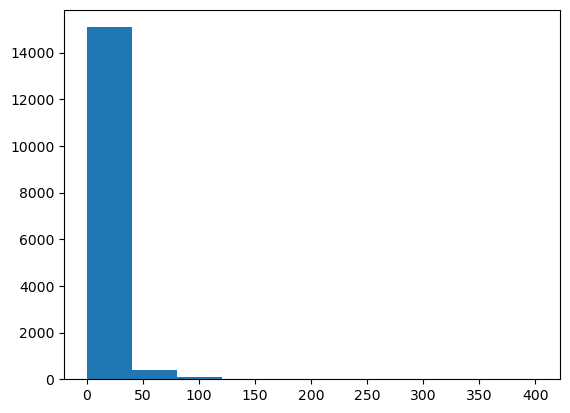

In [17]:
plt.hist(df["length"])
plt.show()
plt.hist(df["word_count"])
plt.show()

# Male and Female words
Word lists adapted from https://github.com/DanielleSucher/Jailbreak-the-Patriarchy/blob/master/myscript.js

In [18]:
with open("wordLists/male_words", 'r') as file:
    male_words = file.read().splitlines()

In [19]:
with open("wordLists/female_words", 'r') as file:
    female_words = file.read().splitlines()

In [20]:
def count_male(text):
    counter = 0
    for word in male_words:
        counter += text.lower().split().count(word)
    return counter
def count_female(text):
    counter = 0
    for word in female_words:
        counter += text.lower().split().count(word)
    return counter

In [21]:
df["male_words"] = df["Caption"].apply(count_male)

In [22]:
df["female_words"] = df["Caption"].apply(count_female)

In [23]:
df["male_words"].describe()

count    15652.000000
mean         0.102287
std          0.532578
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: male_words, dtype: float64

In [24]:
df["female_words"].describe()

count    15652.000000
mean         0.126118
std          0.673771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         22.000000
Name: female_words, dtype: float64

What are the most male and female tweets in the dataset?

In [25]:
df.iloc[df["female_words"].argmax()].Caption

'Beautiful Johnny "So I\'m gonna share my burn story :D so the reason I look like this, is a pretty long story, hopefully Instagram will give me enough room to type it xD okay well here. November 20th 2003 I was playing in the backyard with my sister Joanna. We had this hay loft fort we made in the shed. And we had no flash lights, so we got a candle & match, brought it into the shed so we could have some light. So my sister leaves to use the bathroom or whatever, and I climb to the top of the fort. I call Max our dog, and he comes running in the shed, jumps on the loft the candle was on. And it falls over. By the time Max got to my lap, I was already surrounded by fire. My sister comes out and screams at me to jump. But I\'m too scared because it\'s too high, and there was fire below me. So Joanna (age 7) comes running to get our older sister Leah in the house, who was baby sitting us, but was doing homework with my brother Luke at the time. So Joanna screams at Leah (older sister) JO

In [26]:
df.iloc[df["male_words"].argmax()].Caption

"a victim of rape. I'm a survivor. This is my story. With domestic violence being such a big issue in Australia at the moment. I thought I would share my story in hope that it will inspire at least one person to get help. I was with my ex partner for just over a year, things were great..at the start. Until he got addicted and started to rely heavily on the drug crystal meth. That's when things started to get abusive and extremely violent and I started to lie to my friends that I wasn't seeing him, because they knew how abusive he was. I had to cover marks and bruises with make up. I refused to believe that he was an unstable person, and believed that I could change him, but I couldn't. One day we went out to a club and he drugged me, I woke up tied to a bed and was gang raped by him and 7 other people. He made me believe that I deserved the abuse and I would take it. Towards the end of the relationship he called me telling me to go to his house because there was some type of emergency.

# Sentiment analysis scores from Afinn

In [28]:
from afinn import Afinn
afinn = Afinn(language='en')
df["afinn"] = df["Caption"].apply(afinn.score)

In [29]:
df.sample(10)

,Caption,Instagram,YouTube,Twitter,positive_words,negative_words,length,word_count,male_words,female_words,afinn
4665,Fixed my nails.. Thank you,1,0,0,1,0,27,5,0,0,2.0
7511,Paris Squad,1,0,0,0,0,12,2,0,0,0.0
2942,peachy,1,0,0,0,0,7,1,0,0,0.0
2873,blondies,1,0,0,0,0,9,1,0,0,0.0
5552,,1,0,0,0,0,1,0,0,0,0.0
11193,Lol,1,0,0,0,0,4,1,0,0,3.0
3692,Me & Amelia looking over at like..,1,0,0,0,0,35,7,0,0,2.0
3552,just our usual morning routine,1,0,0,0,0,31,5,0,0,0.0
11415,Track 15 it's called get used to it i don't kn...,1,0,0,0,0,69,16,0,0,0.0
3151,Another one my cover for issue!!!!!!!,1,0,0,0,0,39,6,0,0,0.0


# Save the resulting Dataframe!

In [31]:
df.to_csv("insta_with_features.csv")